+------------+--------------------+-----------+-----------+--------------------+--------------------+------------------+
|    Size    |   Average Delay    | Max Delay | Min Delay |     Delay STD      |     Delay Var      | Packet Loss Rate |
+------------+--------------------+-----------+-----------+--------------------+--------------------+------------------+
| 100 Bytes  |     13.813338      |   25.752  |   5.186   | 3.942973985427243  |  15.547043849756   |       0.0        |
| 500 Bytes  |     13.013182      |   26.006  |    6.71   | 4.583733638081079  | 21.010614064876002 |       0.0        |
| 1000 Bytes |     12.469376      |   25.872  |   6.767   | 3.820299870248931  | 14.594691098623999 |       0.0        |
| 1500 Bytes |     12.216874      |   25.489  |   7.006   | 3.606656993966019  |  13.007974672124   |       0.0        |
| 3000 Bytes | 14.922625250501001 |   27.05   |   7.943   | 4.192341228932026  | 17.575724979803294 |      0.002       |
| 5000 Bytes | 16.70532565130260

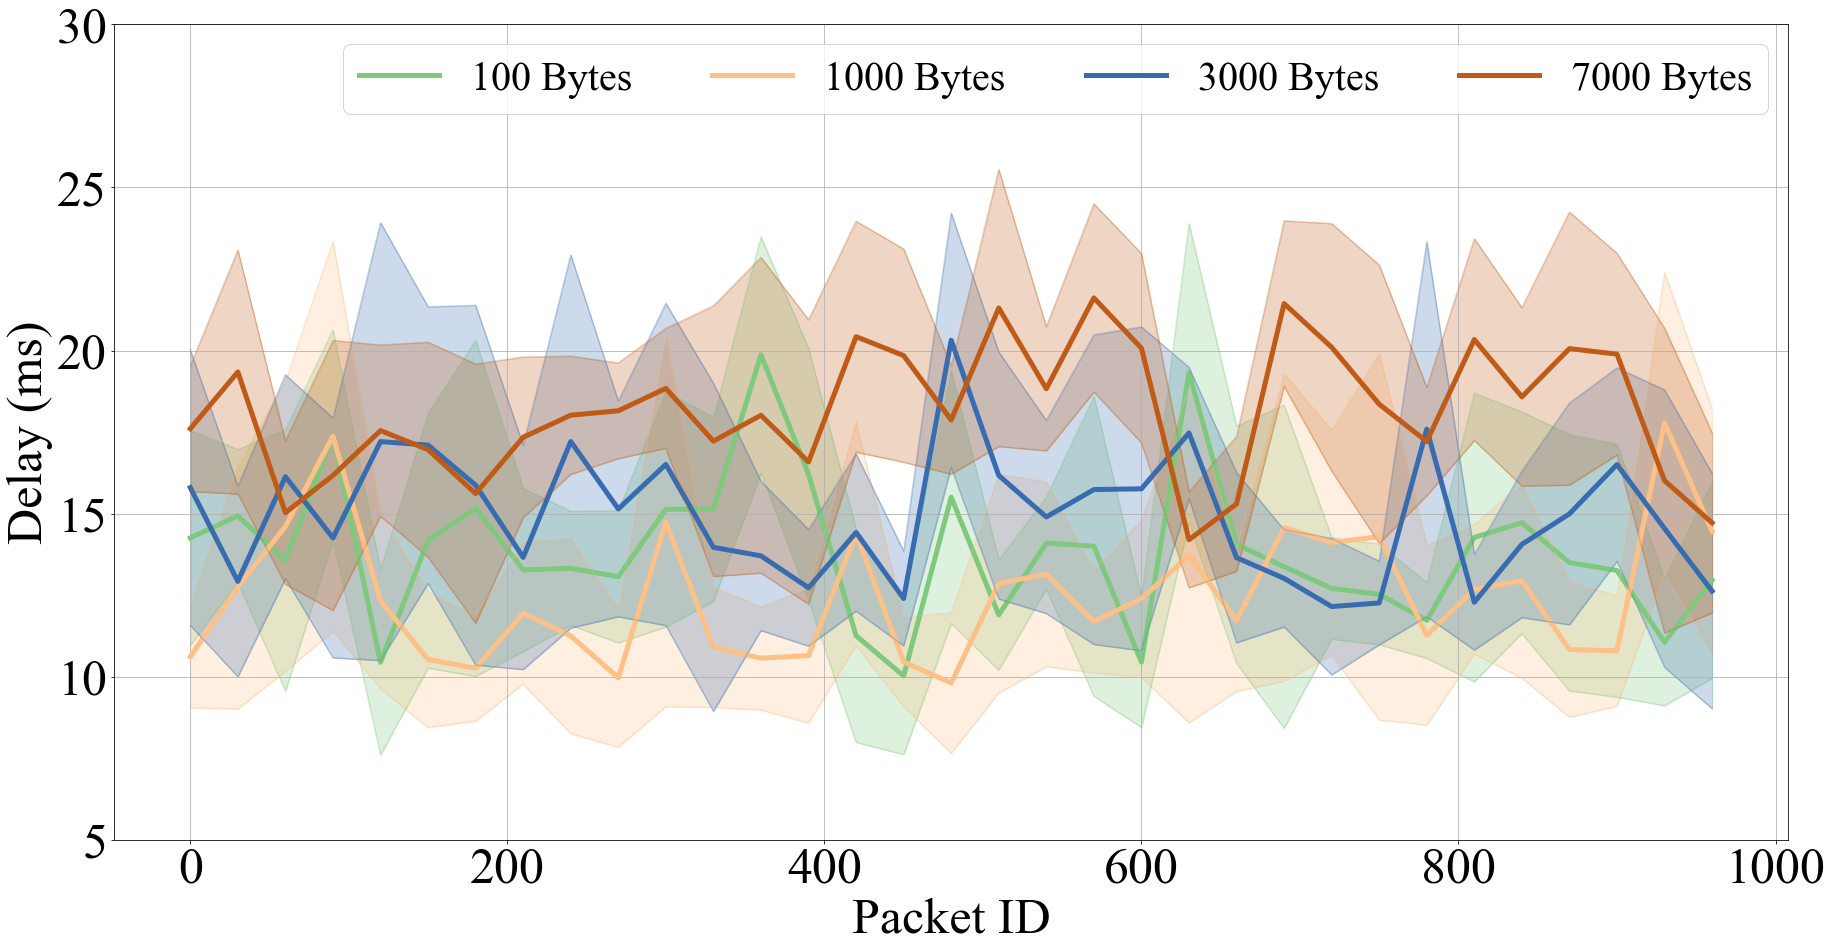

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import brewer2mpl

bmap = brewer2mpl.get_map('Accent', 'qualitative', 7)
colors = bmap.mpl_colors

file_name_100 = "100 Bytes/TestRX_2023-03-24_23-21-24.64CF72CB"
file_name_500 = "500 Bytes/TestRX_2023-03-24_23-25-36.1C948457"
file_name_1000 = "1000 Bytes/TestRX_2023-03-24_23-05-41.F2CC216E"
file_name_1500 = "1500 Bytes/TestRX_2023-03-24_23-03-16.38DB3041"
file_name_3000 = "3000 Bytes/TestRX_2023-03-24_23-14-43.32843EDE"
file_name_5000 = "5000 Bytes/TestRX_2023-03-24_23-08-10.49CCD6E5"
file_name_7000 = "7000 Bytes/TestRX_2023-03-24_23-12-01.574EFF0D"

file_name = []
file_name.append(file_name_100)
file_name.append(file_name_500)
file_name.append(file_name_1000)
file_name.append(file_name_1500)
file_name.append(file_name_3000)
file_name.append(file_name_5000)
file_name.append(file_name_7000)

delays = []
packet_sum = 1000

for file in file_name:
    f = open(file)               # 返回一个文件对象 
    line = f.readline()               # 调用文件的 readline()方法
    delay = list()
    while line: 
        line_split = line.split(',')
        try:
            end_time = line_split[7]
            start_time = line_split[20]
        except IndexError:
            line = f.readline()
            continue
        try:    
            timesteamp = (int(end_time) - int(start_time)) / 1000  # ms
            delay.append(timesteamp)
        except ValueError:
            pass
        line = f.readline()
    delays.append(delay)
    f.close() 
    
table = PrettyTable(['Size', 'Average Delay','Max Delay','Min Delay', 'Delay STD', 'Delay Var', 'Packet Loss Rate'])
byte_list = ['100 Bytes', '500 Bytes', '1000 Bytes', '1500 Bytes', '3000 Bytes', '5000 Bytes', '7000 Bytes']

for i in range(len(delays)):
    np_array = np.array(delays[i])
    table.add_row([
        byte_list[i], 
        np_array.mean(), 
        np_array.max(),
        np_array.min(),
        np_array.std(),          # 标准差
        np_array.var(),          # 方差
        ((packet_sum - np_array.size) / packet_sum)
    ])

print(table)


def get_mean_and_standard_deviation_result(result, ranges, max_num):
    """From a list of lists of agent results it extracts the mean results and the mean results plus or minus
        some multiple of the standard deviation"""
    mean_results = []
    mean_minus_std = []
    mean_plus_std = []
    index = 0
    for i in range(int(max_num / ranges) - 1):
        result_at_a_range = result[index: index + ranges]
        index += ranges
        mean_result = np.mean(result_at_a_range)
        std_result = np.std(result_at_a_range)
        mean_results.append(mean_result)
        mean_minus_std.append(mean_result - std_result)
        mean_plus_std.append(mean_result + std_result)
    
    result_at_a_range = result[-ranges:]
    mean_result = np.mean(result_at_a_range)
    std_result = np.std(result_at_a_range)
    mean_results.append(mean_result)
    mean_minus_std.append(mean_result - std_result)
    mean_plus_std.append(mean_result + std_result)
    return mean_minus_std, mean_results, mean_plus_std


def draw_one_result(axe, epoch_index, rewards, ranges, max_num, colors, line_label, linewidth=5.0):
    mean_minus_std, mean_results, mean_plus_std = get_mean_and_standard_deviation_result(rewards, ranges, max_num)
    x_vals = list(range(len(mean_results)))
    nex_x_vals = [x * ranges for x in x_vals]
    axe.plot(nex_x_vals, mean_results, color=colors[0], label=line_label, linewidth=linewidth)
    axe.plot(nex_x_vals, mean_plus_std, color=colors[0], alpha=0.25)
    axe.plot(nex_x_vals, mean_minus_std, color=colors[0], alpha=0.25)
    axe.fill_between(nex_x_vals, y1=mean_minus_std, y2=mean_plus_std, alpha=0.25, color=colors[0])

df = pd.DataFrame (delays).transpose()
df.columns = ['100 Bytes', '500 Bytes', '1000 Bytes', '1500 Bytes', '3000 Bytes', '5000 Bytes', '7000 Bytes']
df.to_csv("delays.csv")

labels = ['100 Bytes', '500 Bytes', '1000 Bytes', '1500 Bytes', '3000 Bytes', '5000 Bytes', '7000 Bytes']
markers = ['*', 'd', 's', '^', 'o', 'P', 'X']
font_size = 50
legend_size = 40
markersize = 10
plt.figure(figsize=(30, 15))  
plt.rcParams['font.family'] = 'Times New Roman'  # 设置字体

epoch_index = []
for i in range(1000):
    epoch_index.append(i)
    
ranges = 30
max_num = 1000
i = 0
draw_one_result(plt, epoch_index, np.array(delays[i]), ranges, max_num, colors[i:i+2], line_label=labels[i])
i = 2
draw_one_result(plt, epoch_index, np.array(delays[i]), ranges, max_num, colors[i:i+2], line_label=labels[i])
i = 4
draw_one_result(plt, epoch_index, np.array(delays[i]), ranges, max_num, colors[i:i+2], line_label=labels[i])
i = 6
draw_one_result(plt, epoch_index, np.array(delays[i]), ranges, max_num, colors[i:i+2], line_label=labels[i])
# for i in range(len(delays)):
    # draw_one_result(plt, epoch_index, np.array(delays[i]), ranges, max_num, colors[i:i+2], line_label=labels[i])
    # plt.plot(range(len(delays[i])), delays[i], marker=markers[i], markersize=markersize, color=colors[i], alpha=0.5, label=labels[i])

plt.tick_params(labelsize=font_size)        # 设置坐标轴上刻度的字体大小
plt.ylim(5, 30)
# plt.xlim(0,1000)
plt.grid()
plt.legend(loc=0, fontsize = legend_size, ncol=4)     # 显示图例，loc=0表示图例会根据图片情况自动摆放
plt.xlabel("Packet ID", fontsize=font_size)  # 横坐标名字
plt.ylabel("Delay (ms)", fontsize=font_size)  # 纵坐标名字
plt.savefig("Fig-delays.pdf", bbox_inches='tight')
plt.show()